In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import RandomRotation, RandomFlip
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [8]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# !kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p /content/Plant_disease_detection --unzip

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [10]:
train_dir = '/content/Plant_disease_detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
val_dir = '/content/Plant_disease_detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [51]:
BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS = 3
EPOCHS = 20
NUM_CLASSES = 38  # Adjust based on your dataset

In [52]:
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(128,128),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 70295 files belonging to 38 classes.


In [53]:
val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size=(128,128),
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 17572 files belonging to 38 classes.


In [54]:
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])

In [55]:
model = Sequential([
    # Data augmentation
    data_augmentation,

    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.6),  # Increased dropout rate
    Dense(NUM_CLASSES, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [61]:
def lr_schedule(epoch, lr):
    if epoch % 5 == 0 and epoch > 0:
        lr = lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

In [62]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [63]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 75s 33ms/step - accuracy: 0.1425 - loss: 6.1788 - val_accuracy: 0.5737 - val_loss: 2.3362 - learning_rate: 0.0010
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.5490 - loss: 2.5594 - val_accuracy: 0.7200 - val_loss: 2.0871 - learning_rate: 0.0010
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.6847 - loss: 2.2749 - val_accuracy: 0.7530 - val_loss: 2.1216 - learning_rate: 0.0010
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.7281 - loss: 2.2165 - val_accuracy: 0.7849 - val_loss: 2.0893 - learning_rate: 0.0010
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.7583 - loss: 2.1785 - val_accuracy: 0.8406 - val_loss: 1.9453 - learning_rate: 0.0010
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 93s 38ms/step - accuracy: 0.8306 - loss: 1.6935 - val_accuracy: 0.8683 - val_loss: 1.2769 - learning_rate: 5.0000e-04
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 37ms/step - a

In [65]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,874,932 (148.30 MB)

 Trainable params: 12,958,310 (49.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,916,622 (98.86 MB)

In [66]:
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9623 - loss: 0.3993
Validation Loss: 0.4314732253551483
Validation Accuracy: 0.9516276121139526


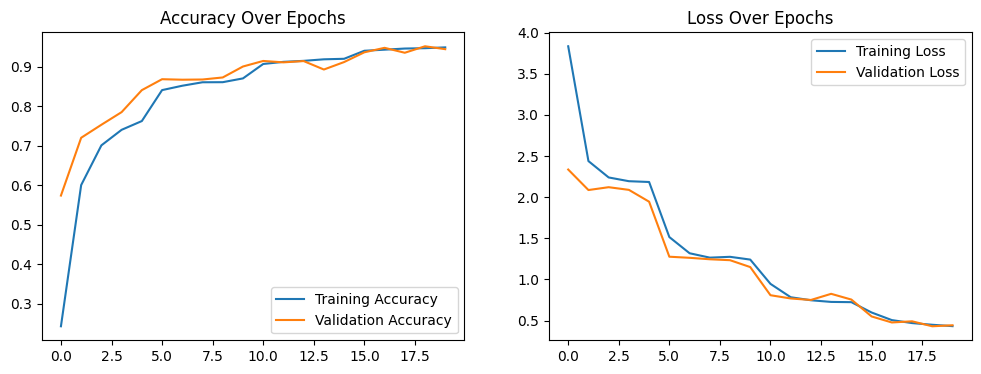

In [67]:
# Plot training and validation metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

In [68]:
# Generate predictions
y_pred = model.predict(val_ds)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true = tf.concat([y for x, y in val_ds], axis=0)
y_true_classes = tf.argmax(y_true, axis=1)


550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step


In [69]:
print(classification_report(y_true_classes, y_pred_classes, target_names=val_ds.class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.96      0.95       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.94      0.96      0.95       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.94      0.96       421
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.91      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.94      0.

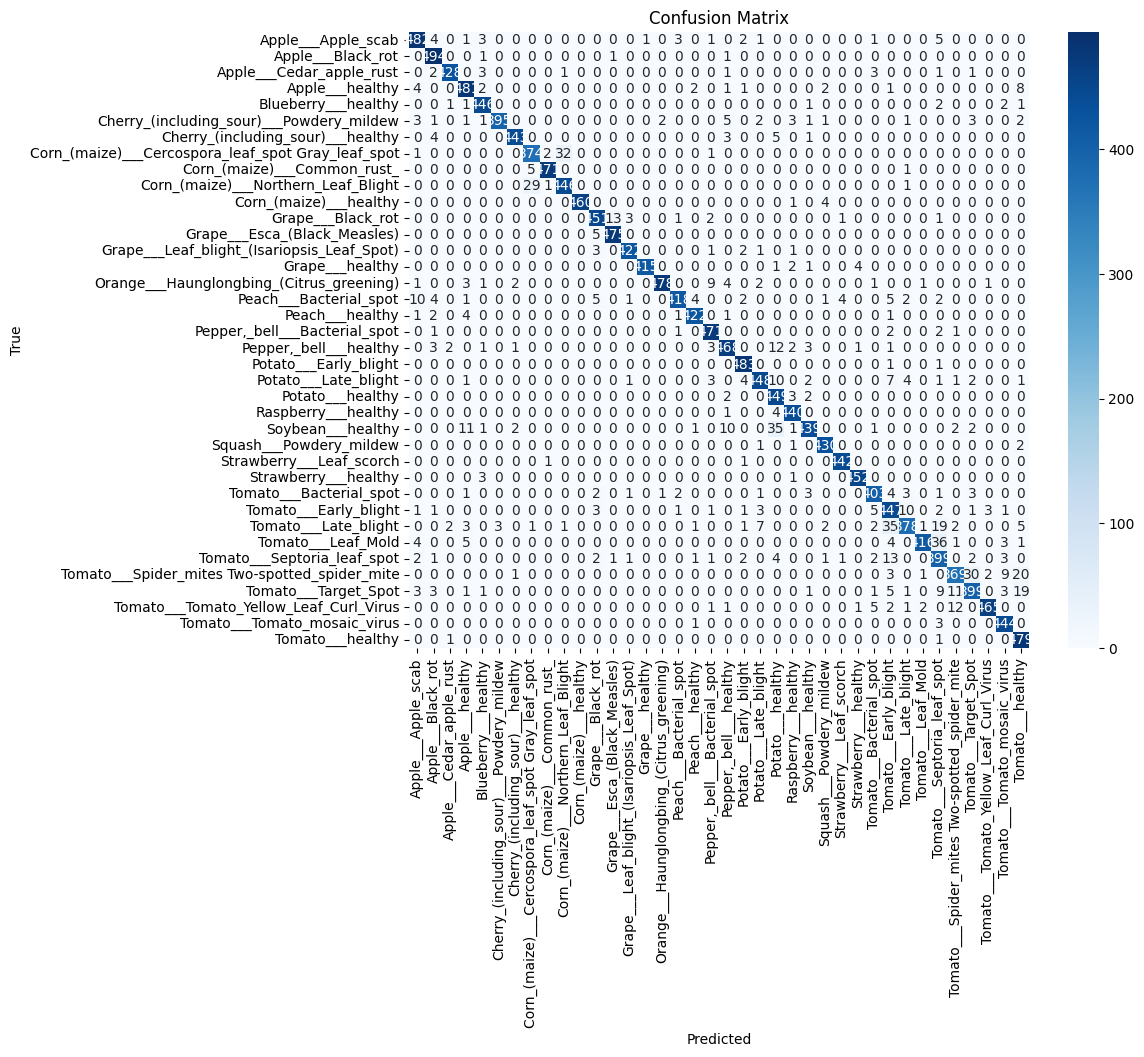

In [70]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_ds.class_names, yticklabels=val_ds.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [71]:
model.save('plant_disease_model.keras')